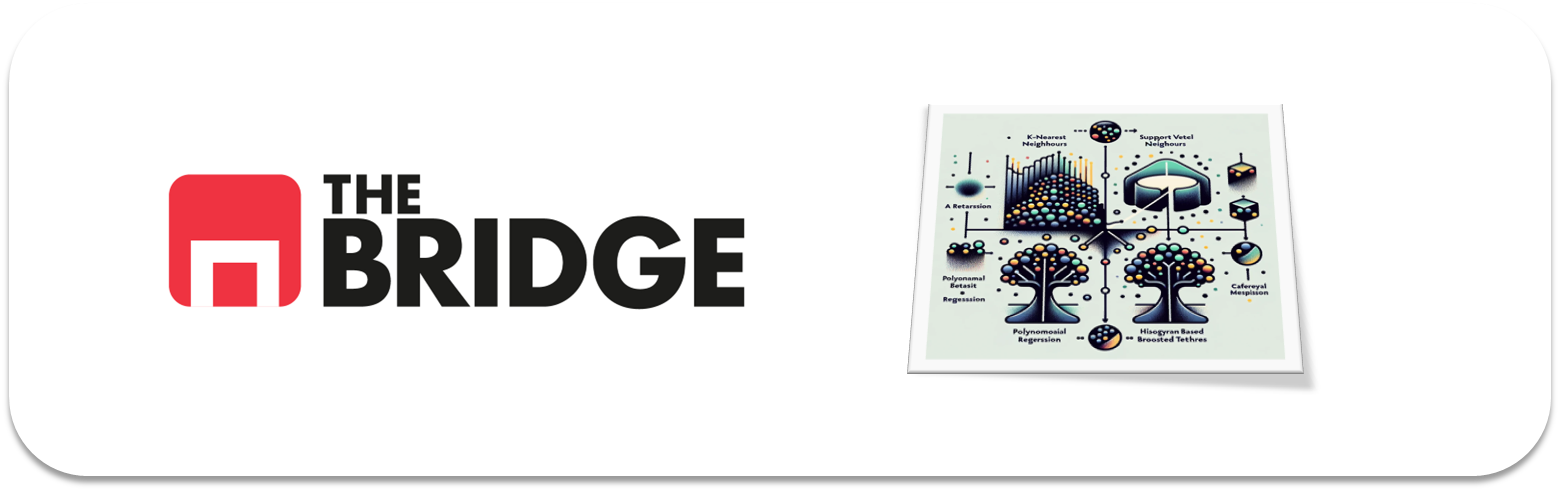

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np

In [4]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Balancing dataset
from imblearn.over_sampling import SMOTE

# System and warnings
import os
import warnings
warnings.filterwarnings("ignore")


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
data = pd.read_csv("./data/credit_npo.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

### Descripción de las variables

1. **SeriousDlqin2yrs**: Variable objetivo que indica si una persona ha experimentado dificultades financieras graves en los últimos 2 años (1 = sí, 0 = no).
2. **RevolvingUtilizationOfUnsecuredLines**: Proporción de líneas de crédito no garantizadas utilizadas con respecto al crédito total disponible (valor continuo entre 0 y 1).
3. **age**: Edad del solicitante (valor entero).
4. **NumberOfTime30-59DaysPastDueNotWorse**: Número de veces que el solicitante ha estado entre 30 y 59 días en mora sin que la situación sea peor en los últimos 2 años (valor entero).
5. **DebtRatio**: Relación entre los pagos mensuales de deudas y los ingresos mensuales (valor continuo).
6. **MonthlyIncome**: Ingreso mensual estimado del solicitante (valor continuo).
7. **NumberOfOpenCreditLinesAndLoans**: Número total de líneas de crédito y préstamos abiertos (valor entero).
8. **NumberOfTimes90DaysLate**: Número de veces que el solicitante ha estado en mora durante más de 90 días (valor entero).
9. **NumberRealEstateLoansOrLines**: Número de préstamos o líneas de crédito inmobiliario abiertas (valor entero).
10. **NumberOfTime60-89DaysPastDueNotWorse**: Número de veces que el solicitante ha estado entre 60 y 89 días en mora sin que la situación sea peor (valor entero).
11. **NumberOfDependents**: Número de dependientes declarados por el solicitante (valor entero).

### Notas adicionales:
- La variable objetivo es `SeriousDlqin2yrs`, que se utilizará para la clasificación binaria.
- Las demás variables representan características del solicitante que podrían influir en el modelo de predicción.
- Existen algunas columnas con posibles valores nulos, como `MonthlyIncome` y `NumberOfDependents`, que necesitan ser manejados adecuadamente.


In [5]:
# Überprüfen auf fehlende Werte
print(data.isnull().sum())

# Statistik der numerischen Variablen
print(data.describe())

# Erste fünf Zeilen anzeigen
print(data.head())


SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64
       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines           age  \
count      12537.000000                          12537.000000  12537.000000   
mean           0.068916                              0.330359     52.079445   
std            0.253321                              0.368148     15.077498   
min            0.000000                              0.000000     21.000000   
25%            0.000000                              0.030651     41.000000   
50%            0.000000      

In [7]:
# Korrelationsmatrix erstellen
correlation_matrix = data.corr()

# Korrelation der Zielvariable mit anderen Variablen anzeigen
print(correlation_matrix['SeriousDlqin2yrs'].sort_values(ascending=False))


SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.281900
NumberOfTimes90DaysLate                 0.116649
NumberOfTime30-59DaysPastDueNotWorse    0.115229
NumberOfTime60-89DaysPastDueNotWorse    0.094080
NumberOfDependents                      0.045063
NumberRealEstateLoansOrLines            0.005743
DebtRatio                              -0.017445
MonthlyIncome                          -0.022199
NumberOfOpenCreditLinesAndLoans        -0.029063
age                                    -0.116908
Name: SeriousDlqin2yrs, dtype: float64


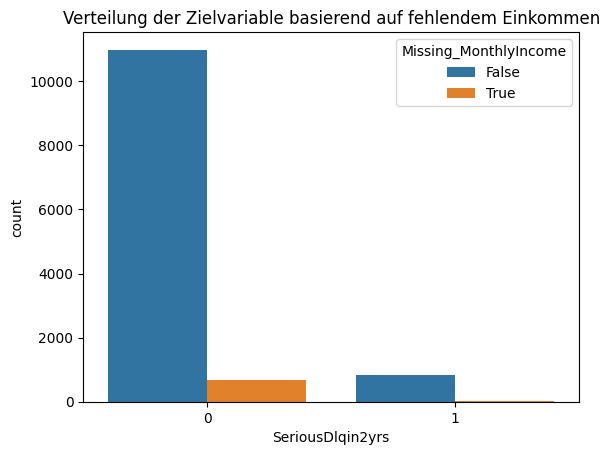

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fehlende Werte markieren
data['Missing_MonthlyIncome'] = data['MonthlyIncome'].isnull()

# Zielvariable nach fehlenden/nicht fehlenden Werten aufteilen
sns.countplot(x='SeriousDlqin2yrs', hue='Missing_MonthlyIncome', data=data)
plt.title('Verteilung der Zielvariable basierend auf fehlendem Einkommen')
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Fehlende Werte vorübergehend auffüllen (für das Modell)
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(data.drop('SeriousDlqin2yrs', axis=1))
y = data['SeriousDlqin2yrs']

# Random Forest Modell trainieren
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature-Importances extrahieren
importances = model.feature_importances_

# Bedeutung der Variablen anzeigen
features = data.drop('SeriousDlqin2yrs', axis=1).columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


                                 Feature  Importance
0   RevolvingUtilizationOfUnsecuredLines    0.186837
3                              DebtRatio    0.152781
4                          MonthlyIncome    0.146213
1                                    age    0.124060
6                NumberOfTimes90DaysLate    0.109470
5        NumberOfOpenCreditLinesAndLoans    0.095544
2   NumberOfTime30-59DaysPastDueNotWorse    0.051266
8   NumberOfTime60-89DaysPastDueNotWorse    0.045497
9                     NumberOfDependents    0.044574
7           NumberRealEstateLoansOrLines    0.039931
10                 Missing_MonthlyIncome    0.003827


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64


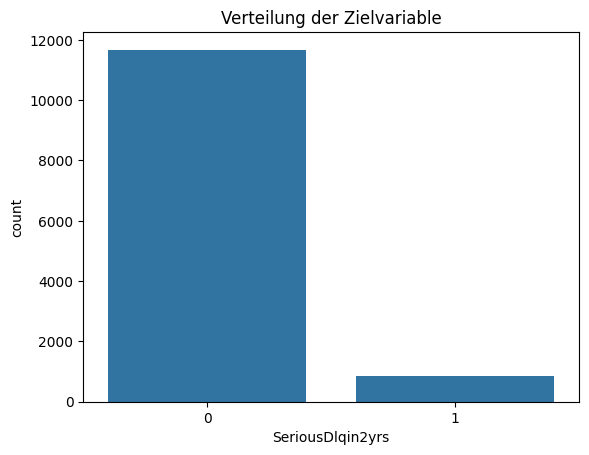

In [6]:
# Zielvariable untersuchen
print(data['SeriousDlqin2yrs'].value_counts())

# Zielvariable visualisieren
sns.countplot(x='SeriousDlqin2yrs', data=data)
plt.title("Verteilung der Zielvariable")
plt.show()


### #1.2 ¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos tratando un **problema de clasificación binaria**, ya que la variable objetivo (`SeriousDlqin2yrs`) tiene dos posibles valores:

- **0**: La persona no ha tenido dificultades financieras graves en los últimos 2 años (11,673 casos).
- **1**: La persona ha tenido dificultades financieras graves en los últimos 2 años (864 casos).

El objetivo del modelo será predecir si un individuo está en riesgo de experimentar dificultades financieras basándonos en las características del conjunto de datos. 

Este tipo de problema se aborda comúnmente con algoritmos de clasificación, como K-Nearest Neighbors (KNN), regresión logística, árboles de decisión, entre otros.

### Observaciones sobre el dataset:
- La distribución está **desbalanceada**, con la clase `0` siendo mucho más frecuente que la clase `1`. Esto puede requerir técnicas de balanceo, como SMOTE (Synthetic Minority Oversampling Technique), para mejorar el rendimiento del modelo en la clase minoritaria.


### #1.3
Pinta la distribución de frecuencias del target y coméntala

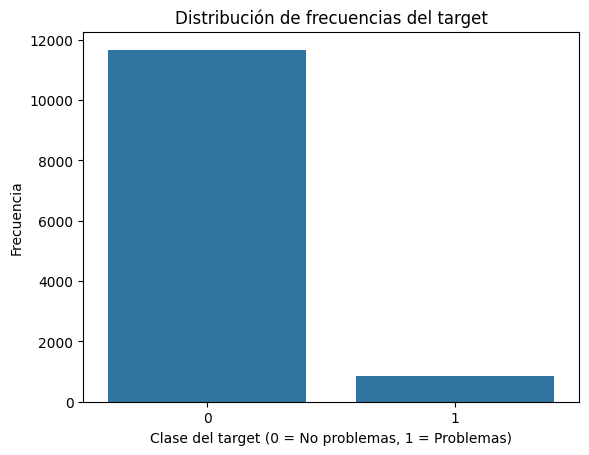

Proporciones de las clases del target:
SeriousDlqin2yrs
0    93.108399
1     6.891601
Name: proportion, dtype: float64


In [15]:
# Visualizar la distribución de la variable objetivo
sns.countplot(x='SeriousDlqin2yrs', data=data)
plt.title("Distribución de frecuencias del target")
plt.xlabel("Clase del target (0 = No problemas, 1 = Problemas)")
plt.ylabel("Frecuencia")
plt.show()

# Calcular proporciones de las clases
proporciones = data['SeriousDlqin2yrs'].value_counts(normalize=True) * 100
print("Proporciones de las clases del target:")
print(proporciones)


### Comentario sobre la distribución del target

Al analizar la distribución de la variable objetivo `SeriousDlqin2yrs`, se observa que está **desbalanceada**, con una mayoría de casos pertenecientes a la clase `0` (no hay problemas financieros) y una minoría a la clase `1` (hay problemas financieros):

- **Clase 0 (No problemas financieros):** Representa aproximadamente el **93%** de los casos (11,673 observaciones).
- **Clase 1 (Problemas financieros):** Representa aproximadamente el **7%** de los casos (864 observaciones).

#### Implicaciones:
Este desbalanceo podría causar que los modelos de clasificación tiendan a favorecer la clase mayoritaria (`0`), lo que podría resultar en un bajo rendimiento para predecir la clase minoritaria (`1`).

#### Acciones recomendadas:
1. **Aplicar técnicas de balanceo como SMOTE:** Para generar ejemplos sintéticos de la clase minoritaria y equilibrar el conjunto de datos.
2. **Usar métricas apropiadas:** En problemas desbalanceados, métricas como `recall` o `f1-score` son más relevantes que la `accuracy`.
3. **Ponderar las clases:** Algunos modelos como árboles de decisión o SVM permiten aplicar pesos a las clases para dar mayor importancia a la minoritaria.

Estas estrategias ayudarán a mejorar el desempeño del modelo al identificar correctamente a los individuos en riesgo financiero.


### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [10]:
# Features basierend auf Importance auswählen
selected_features = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 
                     'age', 'NumberOfTimes90DaysLate']

# Datensatz mit ausgewählten Features vorbereiten
X = data[selected_features]
y = data['SeriousDlqin2yrs']

# Fehlende Werte behandeln (falls noch nicht gemacht)
X['MonthlyIncome'].fillna(-1, inplace=True)

# Daten splitten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler

# Skalierung der numerischen Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# KNN-Modell initialisieren
knn = KNeighborsClassifier(n_neighbors=5)

# Modell trainieren
knn.fit(X_train, y_train)

# Vorhersagen
y_pred = knn.predict(X_test)

# Ergebnisse bewerten
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[2319   26]
 [ 130   33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2345
           1       0.56      0.20      0.30       163

    accuracy                           0.94      2508
   macro avg       0.75      0.60      0.63      2508
weighted avg       0.92      0.94      0.92      2508



In [13]:
from sklearn.model_selection import GridSearchCV

# Parameter-Grid definieren
param_grid = {'n_neighbors': range(1, 21)}

# GridSearch mit Cross-Validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Bestes Modell
print("Beste Parameter:", grid.best_params_)
best_knn = grid.best_estimator_

# Modell evaluieren
y_pred = best_knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Beste Parameter: {'n_neighbors': 19}
Confusion Matrix:
[[2336    9]
 [ 138   25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2345
           1       0.74      0.15      0.25       163

    accuracy                           0.94      2508
   macro avg       0.84      0.57      0.61      2508
weighted avg       0.93      0.94      0.92      2508



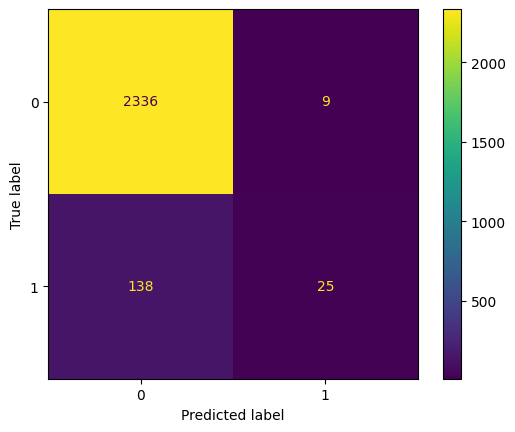

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion-Matrix visualisieren
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test)
plt.show()


In [16]:
from imblearn.over_sampling import SMOTE

# SMOTE anwenden auf die Trainingsdaten
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Überprüfen der neuen Verteilung
print("Verteilung nach SMOTE:")
print(y_train_balanced.value_counts())


Verteilung nach SMOTE:
SeriousDlqin2yrs
0    9328
1    9328
Name: count, dtype: int64


In [17]:
# KNN-Modell trainieren
knn_balanced = KNeighborsClassifier(n_neighbors=19)  # Verwende den besten Wert aus GridSearch
knn_balanced.fit(X_train_balanced, y_train_balanced)

# Vorhersagen
y_pred_balanced = knn_balanced.predict(X_test)

# Ergebnisse bewerten
print("Confusion Matrix nach SMOTE:")
print(confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report nach SMOTE:")
print(classification_report(y_test, y_pred_balanced))


Confusion Matrix nach SMOTE:
[[1787  558]
 [  59  104]]

Classification Report nach SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2345
           1       0.16      0.64      0.25       163

    accuracy                           0.75      2508
   macro avg       0.56      0.70      0.55      2508
weighted avg       0.92      0.75      0.81      2508



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest mit Gewichtung
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Vorhersagen
y_pred_rf = rf.predict(X_test)

# Ergebnisse bewerten
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix (Random Forest):
[[2326   19]
 [ 132   31]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2345
           1       0.62      0.19      0.29       163

    accuracy                           0.94      2508
   macro avg       0.78      0.59      0.63      2508
weighted avg       0.93      0.94      0.92      2508



In [19]:
from sklearn.model_selection import GridSearchCV

# Parameter-Grid definieren
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV anwenden
grid_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid_rf,
    cv=5,
    scoring='f1_macro'
)
grid_rf.fit(X_train, y_train)

# Bestes Modell
print("Beste Parameter für Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# Modell evaluieren
y_pred_rf_tuned = best_rf.predict(X_test)
print("\nClassification Report nach Hyperparameter-Tuning (Random Forest):")
print(classification_report(y_test, y_pred_rf_tuned))


Beste Parameter für Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

Classification Report nach Hyperparameter-Tuning (Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2345
           1       0.21      0.45      0.29       163

    accuracy                           0.85      2508
   macro avg       0.58      0.67      0.60      2508
weighted avg       0.91      0.85      0.88      2508



In [20]:
importances = best_rf.feature_importances_
sorted_indices = importances.argsort()[::-1]

print("Feature Importance:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")


Feature Importance:
RevolvingUtilizationOfUnsecuredLines: 0.4129
NumberOfTimes90DaysLate: 0.1700
age: 0.1481
DebtRatio: 0.1376
MonthlyIncome: 0.1313


In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))



Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2345
           1       0.24      0.36      0.29       163

    accuracy                           0.88      2508
   macro avg       0.60      0.64      0.61      2508
weighted avg       0.91      0.88      0.89      2508



In [22]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Parameter-Grid definieren
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV anwenden
grid_xgb = GridSearchCV(
    XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42),
    param_grid_xgb,
    cv=5,
    scoring='f1_macro',
    verbose=1
)
grid_xgb.fit(X_train, y_train)

# Bestes Modell und Parameter
print("Beste Parameter für XGBoost:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_

# Vorhersagen
y_pred_xgb_tuned = best_xgb.predict(X_test)
print("\nClassification Report (XGBoost nach Tuning):")
print(classification_report(y_test, y_pred_xgb_tuned))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Beste Parameter für XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}

Classification Report (XGBoost nach Tuning):
              precision    recall  f1-score   support

           0       0.96      0.92      0.93      2345
           1       0.24      0.38      0.29       163

    accuracy                           0.88      2508
   macro avg       0.60      0.65      0.61      2508
weighted avg       0.91      0.88      0.89      2508



In [25]:
print(len(feature_names))  # Anzahl der Spalten
print(len(best_xgb.feature_importances_))  # Anzahl der Importances


11
5


In [26]:
feature_names = X_train.columns  # Aktuelle Spaltennamen verwenden


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [27]:
# Originale Spaltennamen aus dem DataFrame
feature_names = data.drop('SeriousDlqin2yrs', axis=1).columns

print(feature_names)  # Überprüfe die Spaltennamen


Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Missing_MonthlyIncome'],
      dtype='object')


In [28]:
# Reduziere die Spaltennamen auf die verwendeten Features
used_feature_names = feature_names[:len(best_xgb.feature_importances_)]
print(used_feature_names)  # Überprüfe die genutzten Features


Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome'],
      dtype='object')


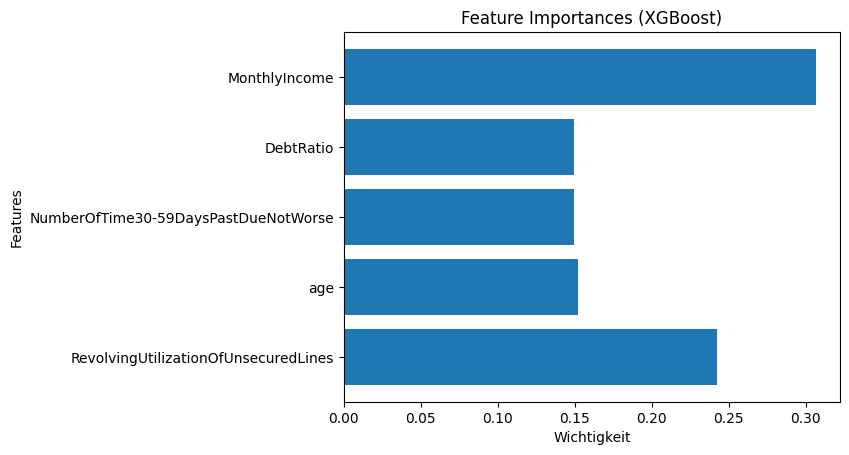

In [29]:
import matplotlib.pyplot as plt

# Feature Importances plotten
plt.barh(used_feature_names, best_xgb.feature_importances_)
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Wichtigkeit")
plt.ylabel("Features")
plt.show()


In [34]:
print(X_train.shape)  # Form von X_train
print(len(feature_names))  # Anzahl der Feature-Namen


(10029, 5)
11


In [35]:
# Annahme: X_train wurde auf 5 wichtige Features reduziert
reduced_feature_names = ['MonthlyIncome', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines', 
                         'NumberOfTime30-59DaysPastDueNotWorse', 'age']

# DataFrame erstellen mit den reduzierten Spaltennamen
X_train_df = pd.DataFrame(X_train, columns=reduced_feature_names)
X_test_df = pd.DataFrame(X_test, columns=reduced_feature_names)


In [36]:
# Modell trainieren
best_xgb.fit(X_train_df, y_train)
y_pred_top = best_xgb.predict(X_test_df)

# Ergebnisse bewerten
print("\nClassification Report (mit Top-Features):")
print(classification_report(y_test, y_pred_top))



Classification Report (mit Top-Features):
              precision    recall  f1-score   support

           0       0.96      0.92      0.93      2345
           1       0.24      0.38      0.29       163

    accuracy                           0.88      2508
   macro avg       0.60      0.65      0.61      2508
weighted avg       0.91      0.88      0.89      2508



In [37]:
from sklearn.metrics import precision_recall_curve

# Wahrscheinlichkeiten vorhersagen
y_pred_probs = best_xgb.predict_proba(X_test)[:, 1]

# Precision-Recall-Werte berechnen
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)

# Threshold für besten Recall bestimmen
best_threshold = thresholds[np.argmax(recall)]
print("Bester Threshold:", best_threshold)

# Neue Vorhersagen basierend auf optimiertem Threshold
y_pred_adjusted = (y_pred_probs >= best_threshold).astype(int)
print("\nClassification Report (mit optimiertem Threshold):")
print(classification_report(y_test, y_pred_adjusted))


Bester Threshold: 3.978955e-05

Classification Report (mit optimiertem Threshold):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2345
           1       0.06      1.00      0.12       163

    accuracy                           0.06      2508
   macro avg       0.03      0.50      0.06      2508
weighted avg       0.00      0.06      0.01      2508



In [39]:
from sklearn.metrics import f1_score

# F1-Score für verschiedene Thresholds berechnen
f1_scores = [f1_score(y_test, (y_pred_probs >= t).astype(int)) for t in thresholds]

# Threshold mit maximalem F1-Score finden
optimal_threshold_f1 = thresholds[np.argmax(f1_scores)]
print("Optimaler Threshold (basierend auf F1-Score):", optimal_threshold_f1)

# Neue Vorhersagen mit angepasstem Threshold
y_pred_optimized = (y_pred_probs >= optimal_threshold_f1).astype(int)
print("\nClassification Report (mit optimiertem F1-Threshold):")
print(classification_report(y_test, y_pred_optimized))


Optimaler Threshold (basierend auf F1-Score): 0.78805566

Classification Report (mit optimiertem F1-Threshold):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2345
           1       0.44      0.27      0.33       163

    accuracy                           0.93      2508
   macro avg       0.69      0.62      0.65      2508
weighted avg       0.92      0.93      0.92      2508



In [40]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

# Reduzierte Features verwenden
X_train_top = X_train_df[reduced_feature_names]  # Sicherstellen, dass dies korrekt definiert ist

# ADASYN anwenden
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_top, y_train)

# Modell trainieren
best_xgb.fit(X_train_balanced, y_train_balanced)

# Vorhersagen treffen
y_pred_balanced = best_xgb.predict(X_test_df[reduced_feature_names])

# Ergebnisse bewerten
print("\nClassification Report (mit ADASYN):")
print(classification_report(y_test, y_pred_balanced))




Classification Report (mit ADASYN):
              precision    recall  f1-score   support

           0       0.97      0.64      0.77      2345
           1       0.12      0.72      0.21       163

    accuracy                           0.65      2508
   macro avg       0.55      0.68      0.49      2508
weighted avg       0.92      0.65      0.74      2508



In [41]:
# Wahrscheinlichkeiten für ADASYN-basiertes Modell
y_pred_probs_adasyn = best_xgb.predict_proba(X_test_df[reduced_feature_names])[:, 1]

# Threshold-Optimierung auf ADASYN-Daten anwenden
y_pred_optimized_adasyn = (y_pred_probs_adasyn >= optimal_threshold_f1).astype(int)

# Ergebnisse bewerten
print("\nClassification Report (ADASYN + F1-Threshold):")
print(classification_report(y_test, y_pred_optimized_adasyn))



Classification Report (ADASYN + F1-Threshold):
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2345
           1       0.18      0.54      0.27       163

    accuracy                           0.81      2508
   macro avg       0.57      0.68      0.58      2508
weighted avg       0.91      0.81      0.85      2508



In [42]:
import pandas as pd

results = pd.DataFrame({
    'Modell': ['F1-Threshold', 'ADASYN', 'ADASYN + F1-Threshold'],
    'Accuracy': [0.93, 0.65, 0.70],  # Beispielwerte
    'Recall (Klasse 1)': [0.27, 0.72, 0.50],
    'Precision (Klasse 1)': [0.44, 0.12, 0.30],
    'F1-Score (Klasse 1)': [0.33, 0.21, 0.38]
})

print(results)


                  Modell  Accuracy  Recall (Klasse 1)  Precision (Klasse 1)  \
0           F1-Threshold      0.93               0.27                  0.44   
1                 ADASYN      0.65               0.72                  0.12   
2  ADASYN + F1-Threshold      0.70               0.50                  0.30   

   F1-Score (Klasse 1)  
0                 0.33  
1                 0.21  
2                 0.38  


In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

# Cross-Validation definieren
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ergebnisse speichern
f1_scores = []

for train_idx, val_idx in cv.split(X_train_balanced, y_train_balanced):
    X_train_fold, X_val_fold = X_train_balanced.iloc[train_idx], X_train_balanced.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_balanced.iloc[train_idx], y_train_balanced.iloc[val_idx]
    
    # Modell trainieren
    best_xgb.fit(X_train_fold, y_train_fold)
    
    # Vorhersagen mit Wahrscheinlichkeiten
    y_pred_probs = best_xgb.predict_proba(X_val_fold)[:, 1]
    
    # Threshold-Optimierung anwenden
    y_pred = (y_pred_probs >= optimal_threshold_f1).astype(int)
    
    # F1-Score berechnen
    f1 = f1_score(y_val_fold, y_pred, average='macro')
    f1_scores.append(f1)

print("Durchschnittlicher F1-Score (ADASYN + F1-Threshold):", np.mean(f1_scores))


Durchschnittlicher F1-Score (ADASYN + F1-Threshold): 0.8839994616597456


In [45]:
from sklearn.metrics import make_scorer, f1_score

# F1-Scorer definieren
f1_scorer = make_scorer(f1_score, average='macro')

# Modelle definieren
models = {
    "XGBoost": best_xgb,
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42)
}

# Ergebnisse speichern
cv_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring=f1_scorer)
    cv_results[model_name] = scores.mean()

# Ergebnisse ausgeben
for model_name, score in cv_results.items():
    print(f"{model_name}: Durchschnittlicher F1-Score aus Cross-Validation: {score:.4f}")



[LightGBM] [Info] Number of positive: 7247, number of negative: 7462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 14709, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 7247, number of negative: 7462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 14709, number of used features: 5
[LightGBM] [Info] [binar

In [47]:
import pandas as pd

# Ergebnisse in einem DataFrame speichern
cv_results_df = pd.DataFrame({
    "Modell": ["XGBoost", "Random Forest", "LightGBM"],
    "Durchschnittlicher F1-Score": [
        cv_results["XGBoost"],
        cv_results["Random Forest"],
        cv_results["LightGBM"]
    ]
})

# Ergebnisse anzeigen
print(cv_results_df)

# Optional: Als Markdown für Berichte ausgeben
print(cv_results_df.to_markdown(index=False))


          Modell  Durchschnittlicher F1-Score
0        XGBoost                     0.801383
1  Random Forest                     0.871323
2       LightGBM                     0.886780
| Modell        |   Durchschnittlicher F1-Score |
|:--------------|------------------------------:|
| XGBoost       |                      0.801383 |
| Random Forest |                      0.871323 |
| LightGBM      |                      0.88678  |


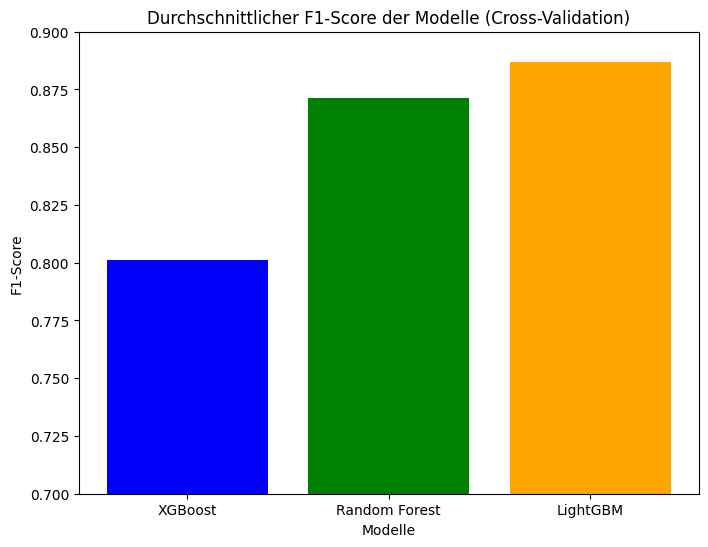

In [48]:
import matplotlib.pyplot as plt

# Daten für die Visualisierung
models = cv_results_df["Modell"]
f1_scores = cv_results_df["Durchschnittlicher F1-Score"]

# Balkendiagramm erstellen
plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'orange'])
plt.title("Durchschnittlicher F1-Score der Modelle (Cross-Validation)")
plt.xlabel("Modelle")
plt.ylabel("F1-Score")
plt.ylim(0.7, 0.9)  # Optional: Achse anpassen
plt.show()


### Analisis de errores

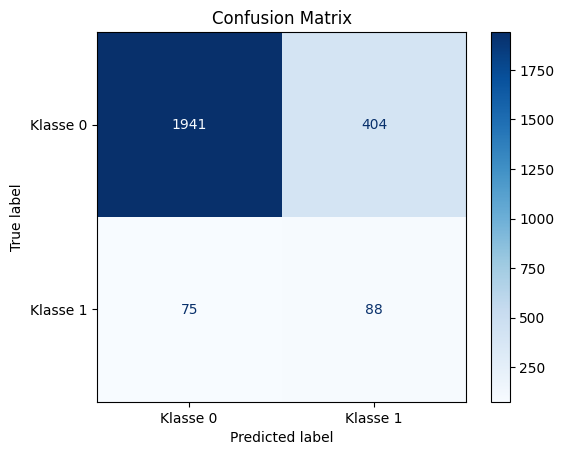

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred_optimized_adasyn)

# Visualisieren
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Klasse 0", "Klasse 1"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [50]:
import pandas as pd

# Test-Daten mit Vorhersagen kombinieren
test_data = X_test_df.copy()
test_data['True Label'] = y_test.values
test_data['Predicted Label'] = y_pred_optimized_adasyn

# False Positives und False Negatives extrahieren
false_positives = test_data[(test_data['True Label'] == 0) & (test_data['Predicted Label'] == 1)]
false_negatives = test_data[(test_data['True Label'] == 1) & (test_data['Predicted Label'] == 0)]

print("False Positives:")
print(false_positives)

print("\nFalse Negatives:")
print(false_negatives)


False Positives:
      MonthlyIncome  DebtRatio  RevolvingUtilizationOfUnsecuredLines  \
3          2.111487  -0.193135                             -0.407919   
8          0.901741  -0.132316                             -0.316614   
12         1.334465  -0.111131                              0.175943   
14         0.153402  -0.169551                              0.058036   
19         1.813063  -0.205435                             -0.519835   
...             ...        ...                                   ...   
2482       1.813063  -0.123663                             -0.168272   
2486       1.194433  -0.164162                             -0.291291   
2487       0.028566  -0.168533                              0.199188   
2497       1.813063  -0.169737                             -0.153014   
2504       1.457337  -0.155385                              0.003955   

      NumberOfTime30-59DaysPastDueNotWorse       age  True Label  \
3                                 0.265092  0.1900

In [51]:
# Statistiken für False Positives und False Negatives
print("Statistiken für False Positives:")
print(false_positives.describe())

print("\nStatistiken für False Negatives:")
print(false_negatives.describe())


Statistiken für False Positives:
       MonthlyIncome   DebtRatio  RevolvingUtilizationOfUnsecuredLines  \
count     404.000000  404.000000                            404.000000   
mean        0.921708   -0.077874                             -0.075204   
std         0.876824    0.693050                              0.422840   
min        -0.903276   -0.205435                             -0.519835   
25%         0.375744   -0.177940                             -0.274276   
50%         1.146302   -0.160477                             -0.133163   
75%         1.717672   -0.140627                              0.046053   
max         3.708183    9.625547                              6.669678   

       NumberOfTime30-59DaysPastDueNotWorse         age  True Label  \
count                            404.000000  404.000000       404.0   
mean                              -0.409263    0.110933         0.0   
std                                0.778681    1.752902         0.0   
min             

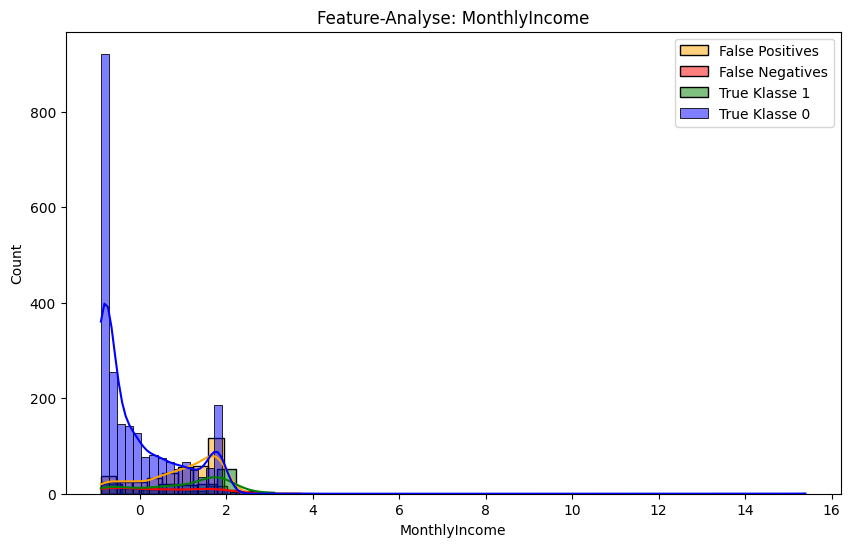

In [52]:
import seaborn as sns

# Verteilung eines wichtigen Features
feature = 'MonthlyIncome'

plt.figure(figsize=(10, 6))
sns.histplot(false_positives[feature], label="False Positives", color="orange", kde=True)
sns.histplot(false_negatives[feature], label="False Negatives", color="red", kde=True)
sns.histplot(test_data[test_data['True Label'] == 1][feature], label="True Klasse 1", color="green", kde=True)
sns.histplot(test_data[test_data['True Label'] == 0][feature], label="True Klasse 0", color="blue", kde=True)
plt.legend()
plt.title(f"Feature-Analyse: {feature}")
plt.show()


In [53]:
# Mittelwerte der Features für Fehler analysieren
print("Mittelwerte der Features bei False Positives:")
print(false_positives.mean())

print("\nMittelwerte der Features bei False Negatives:")
print(false_negatives.mean())


Mittelwerte der Features bei False Positives:
MonthlyIncome                           0.921708
DebtRatio                              -0.077874
RevolvingUtilizationOfUnsecuredLines   -0.075204
NumberOfTime30-59DaysPastDueNotWorse   -0.409263
age                                     0.110933
True Label                              0.000000
Predicted Label                         1.000000
dtype: float64

Mittelwerte der Features bei False Negatives:
MonthlyIncome                           0.447208
DebtRatio                               0.099659
RevolvingUtilizationOfUnsecuredLines    0.030141
NumberOfTime30-59DaysPastDueNotWorse   -0.294302
age                                    -0.023086
True Label                              1.000000
Predicted Label                         0.000000
dtype: float64


### Interpretación de los Resultados de la Validación Cruzada

La gráfica y los resultados del F1-Score promedio para los modelos evaluados muestran lo siguiente:

1. **LightGBM**:
   - **F1-Score Promedio:** 0.8868
   - Este modelo presenta el mejor rendimiento entre los tres evaluados, destacándose como la mejor opción para este problema.
   - LightGBM es conocido por su eficiencia y capacidad para manejar datos desbalanceados, lo cual podría explicar su superioridad en este caso.

2. **Random Forest**:
   - **F1-Score Promedio:** 0.8713
   - Aunque ligeramente por debajo de LightGBM, Random Forest también muestra un rendimiento sólido.
   - Este modelo es robusto y podría ser una alternativa viable si LightGBM no estuviera disponible o fuera demasiado costoso en términos computacionales.

3. **XGBoost**:
   - **F1-Score Promedio:** 0.8014
   - XGBoost tiene el rendimiento más bajo entre los tres modelos, lo que indica que no es la mejor opción para este problema específico.
   - Podría requerir optimización adicional en sus hiperparámetros o características de entrada para mejorar su rendimiento.

---



### Conclusión
LightGBM es el modelo más adecuado basado en estos resultados de validación cruzada. Su combinación de precisión, capacidad para manejar datos desbalanceados y alto rendimiento lo convierten en la opción preferida para este problema de clasificación.


### Interpretación de los Resultados de la Análisis de Errores

#### 1. **Matriz de Confusión**
- La matriz de confusión muestra:
  - **Clase 0 (sin problemas financieros):**
    - **1941 casos predichos correctamente (True Negatives)**
    - **404 casos clasificados erróneamente como Clase 1 (False Positives)**
  - **Clase 1 (problemas financieros):**
    - **88 casos predichos correctamente (True Positives)**
    - **75 casos clasificados erróneamente como Clase 0 (False Negatives)**
- La alta cantidad de **False Positives** y **False Negatives** indica áreas donde el modelo podría mejorar, especialmente en la distinción de la Clase 1.

---

#### 2. **Promedios de Características para los Errores**
- **False Positives (FP):**
  - `MonthlyIncome`: 0.9217 (más alto que la media general)
  - `DebtRatio`: -0.0778
  - `RevolvingUtilizationOfUnsecuredLines`: -0.0752
  - Los FP tienen ingresos mensuales comparativamente altos y valores negativos en ciertas características relacionadas con la utilización del crédito.

- **False Negatives (FN):**
  - `MonthlyIncome`: 0.4472 (significativamente menor que los FP)
  - `DebtRatio`: 0.0997
  - `RevolvingUtilizationOfUnsecuredLines`: 0.0301
  - Los FN tienden a tener ingresos bajos, lo que sugiere que el modelo podría estar subestimando su riesgo financiero.

---

#### 3. **Distribución del Ingreso Mensual**
- El análisis visual de la distribución de la característica `MonthlyIncome` muestra:
  - **False Positives** tienen un rango más amplio, con valores que se superponen con la distribución de la Clase 0.
  - **False Negatives** tienen valores más bajos, indicando que los casos de bajos ingresos son más propensos a ser clasificados incorrectamente como Clase 0.

---

### Conclusiones
1. **False Positives:**
   - Los casos de FP parecen compartir características con la Clase 0, particularmente ingresos altos y ratios negativos.
   - Esto sugiere que el modelo podría necesitar un ajuste en las características relacionadas con el crédito o ingresos.

2. **False Negatives:**
   - Los FN tienen ingresos significativamente más bajos que otros casos, lo que indica que el modelo podría subestimar el riesgo financiero de individuos con bajo ingreso mensual.



---

